**Course**: Data Visualization (Prof. Dr. Heike Leitte, Luisa Vollmer, RPTU Kaiserslautern),   **Name**: XXX XXX,   **Date**: DD.MM.YYYY

<div class="alert alert-info">

    
# Assignment 3 - Exploratory data analysis of the Titanic dataset
</div>

> The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

![](NYT_titanic.png)

source: [wikipedia.org](https://en.wikipedia.org/wiki/RMS_Titanic)


### Outline and goals

In the third assignment, we will explore the titanic dataset using exploratory data analysis. The goals of this exercise are:
- conduct exploratory data analysis using python's seaborn library
- make a structured analysis (of a subset) of a given dataset
- contrast subgroups of data
- find patterns and outliers in data

<div class="alert alert-danger">

**Important**: While no points will be awarded for typing the correct answers in the notebooks, it is highly advised to solve the tasks thoroughly. They are designed to be encouraging and provide you with valuable learnings for the exam, understanding of the methods and practical coding.
</div>

<div class="alert alert-success">
    
All tasks in this notebook are marked in green.
</div>

<div class="alert alert-info">
    
## 1. Load the data
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Description of the titanic dataset:
survived - Survival (0 = No; 1 = Yes)<br>
plass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
sex - Gender<br>
age - Age<br>
sibsp - Number of Siblings/Spouses Aboard<br>
parch - Number of Parents/Children Aboard<br>
fare - Passenger fare<br>
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)<br>
class - Class as string<br>
who - Type of person (child, man, woman)<br>
adult_male - Passenger is an adult male<br>
deck - Deck of passenger's accomodation<br>
embark_town - Port of Embarkation as string<br>
alive - Boolean<br>
alone - Person travelled alone<br>

<div class="alert alert-info">
    
## 2. Get an overview
</div>

The command [`pandas.DataFrame.dtypes`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) returns the data types as inferred by pandas. 

<div class="alert alert-success">
    
Check if the inferred types match with the ones you would have assigned to each column.
</div>

In [2]:
print("Data Types:")
print(titanic.dtypes)
print("\nSummary Statistics:")
titanic.dtypes

Data Types:
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Summary Statistics:


survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

The command [`pandas.DataFrame.describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) provides summary statistics for all attributes.

In [3]:
titanic.describe(include="all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-warning">

The inferred data types match the nature of the data for each column:

survived, pclass, sibsp, parch: Correctly inferred as int64, representing numerical integer values.
age, fare: Correctly inferred as float64, representing continuous numerical values.
sex, embarked, embark_town, alive, who: Correctly inferred as object, representing categorical or text data.
class, deck, deck_all: Correctly inferred as category, representing categorical data that has a limited set of unique values.
adult_male, alone: Correctly inferred as bool, representing boolean (True/False) values.
All inferred data types are consistent with the data and would have been assigned similarly. There are no mismatches.
</div>

<div class="alert alert-success">

    
Which columns contain missing values, commonly NaN? Hint: Consider the 'count' row of `describe`.
</div>

<div class="alert alert-warning">

The columns with missing values are:

age: Only 714 out of 891 values are present, indicating missing values for 177 rows.
deck: Only 203 out of 891 values are present, indicating missing values for 688 rows.
embarked: Only 889 out of 891 values are present, indicating missing values for 2 rows.
These can be identified by comparing the count row in the describe output with the total number of rows (891).
</div>

<div class="alert alert-success">

What are the names of the different decks and how many people were assigned to each deck? Does every passenger have an assigned deck?
</div>

Hint: The method [`pandas.Series.value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) may be helpful.

In [4]:
deck_counts = titanic['deck'].value_counts(dropna=False)
print(deck_counts)

deck
NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: count, dtype: int64


<div class="alert alert-warning">
What are the names of the different decks and how many people were assigned to each deck? Does every passenger have an assigned deck?

The different decks and the number of people assigned to each are:
C: 59 passengers
B: 47 passengers
D: 33 passengers
E: 32 passengers
A: 15 passengers
F: 13 passengers
G: 4 passengers
NaN (no deck assigned): 688 passengers
    
    Not every passenger has an assigned deck. In fact, the majority of passengers (688 out of 891) have no deck information available.
</div>

<div class="alert alert-info">
    
## 3. Analyze variables individually
</div>

First we look into some of the variables individually. We will not cover the entire dataset in detail which would exceed the scope of an assignment, but concentrate on some aspects of it.

**Hints**:
- [documentation of countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot)
- [list of seaborn plots](https://seaborn.pydata.org/api.html#relational-api)
- [Seaborn cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)

**Examples**: 

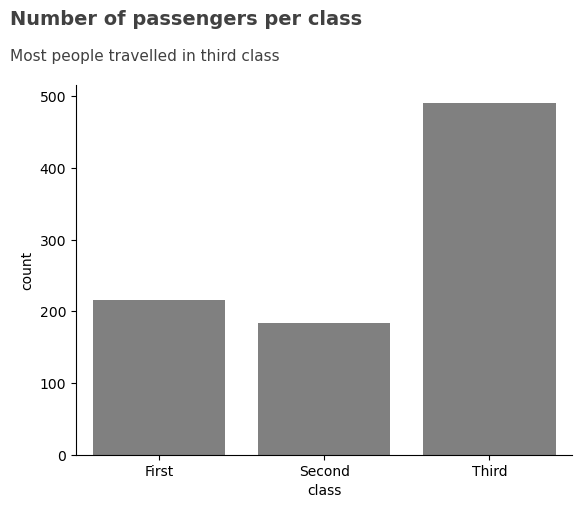

In [5]:
ax = sns.countplot(x="class", data=titanic, color="gray")
ax.text(x=-.9, y=600, s="Number of passengers per class", fontsize=14, fontweight='semibold', color='#414141')
ax.text(x=-.9, y=550, s="Most people travelled in third class", fontsize=11, fontweight='normal', color='#414141')
sns.despine()

<div class="alert alert-success">
    
Finish the histogram below. 
- Set an appropriate number of bins and add a subtitle that tells about one finding. 
- Can you detect different price groups?
</div>

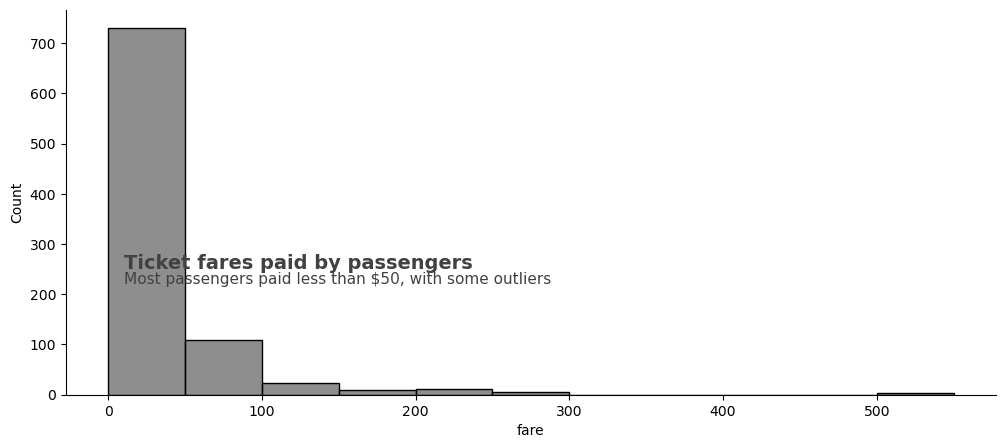

In [6]:
fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.histplot(data=titanic["fare"], color="dimgray", bins=np.arange(0, 600, 50))

ax.text(x=10, y=250, s="Ticket fares paid by passengers", fontsize=14, fontweight='semibold', color='#414141')
ax.text(x=10, y=220, s="Most passengers paid less than $50, with some outliers", fontsize=11, fontweight='normal', color='#414141')

sns.despine()
plt.show()

<div class="alert alert-success">
    
Select two columns/variables from the dataset and plot each with an appropriate chart (= two 1D-histograms, explore more if you want). Check that chart parameters are set appropriately. Add a matching title to your charts and state one finding in the subtitle.
</div>

In [7]:
list(titanic)

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

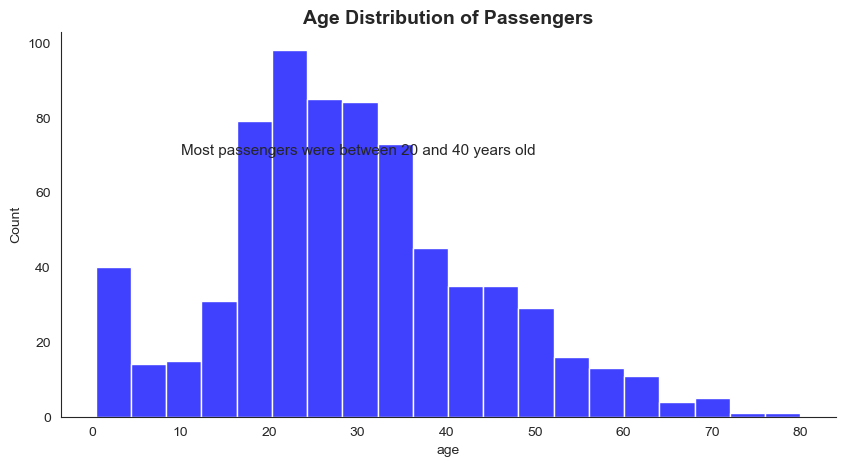

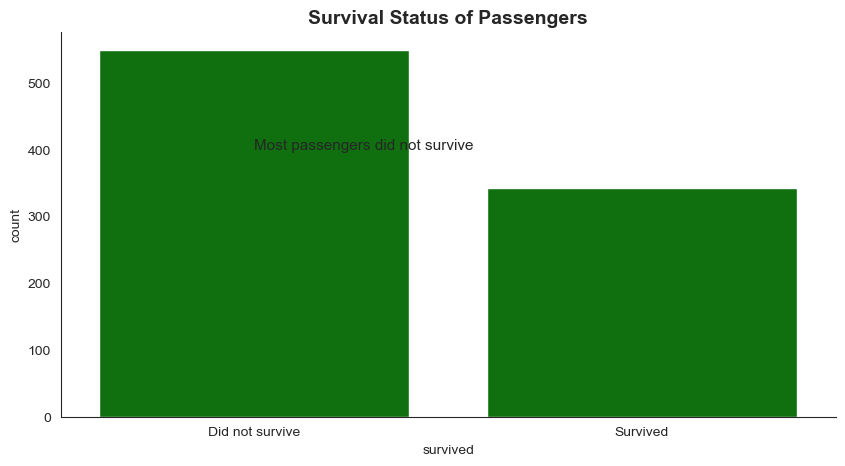

In [8]:
sns.set_style("white")  


fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=titanic, x="age", bins=20, color="blue", ax=ax)
ax.set_title("Age Distribution of Passengers", fontsize=14, fontweight='semibold')
ax.text(x=10, y=70, s="Most passengers were between 20 and 40 years old", fontsize=11, fontweight='normal')
sns.despine()


fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=titanic, x="survived", color="green", ax=ax)
ax.set_title("Survival Status of Passengers", fontsize=14, fontweight='semibold')
ax.text(x=0, y=400, s="Most passengers did not survive", fontsize=11, fontweight='normal')
ax.set_xticklabels(["Did not survive", "Survived"])
sns.despine()

plt.show()


<div class="alert alert-info">
    
## 4. Who did survive?
</div>

For each question below, create a chart in the axes above that helps you answer the questions. It is ok to stick to the [plots implemented in seaborn](https://seaborn.pydata.org/api.html). Some plots, like stacked bar charts, require more work.

<div class="alert alert-success">
    
Who had the highest chance of survival: men, women, or children? Hint: You can add another dimension to you `displot` or `countplot` by coloring bars with 'hue=column_name'.
</div>

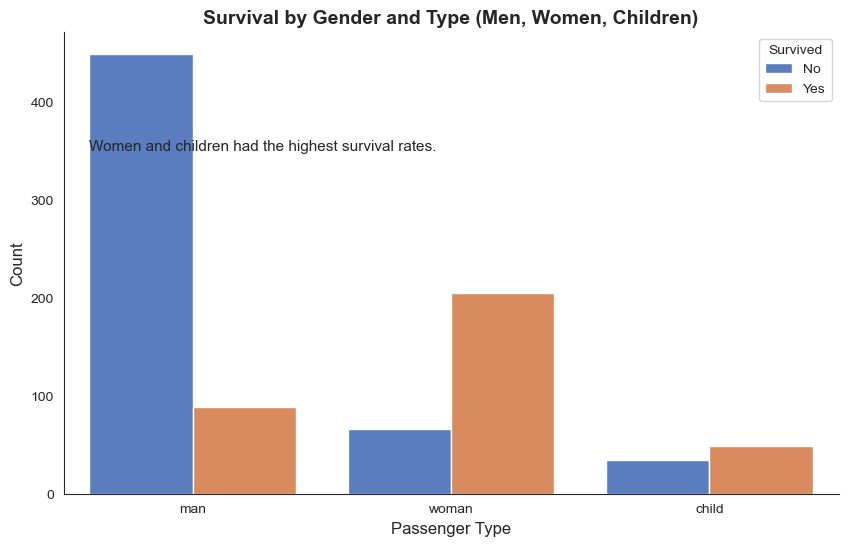

In [9]:

sns.set_style("white")  


fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=titanic, x="who", hue="alive", palette="muted", ax=ax)


ax.set_title("Survival by Gender and Type (Men, Women, Children)", fontsize=14, fontweight='semibold')
ax.set_xlabel("Passenger Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.legend(title="Survived", labels=["No", "Yes"], loc="upper right")


ax.text(x=-0.4, y=350, s="Women and children had the highest survival rates.", fontsize=11, fontweight='normal')


sns.despine()


plt.show()


<div class="alert alert-success">
    
Did age have an influence? Compare the age of people who survived and those who did not. Is your observation consistent for all three types of people (men, women, children)?
</div>

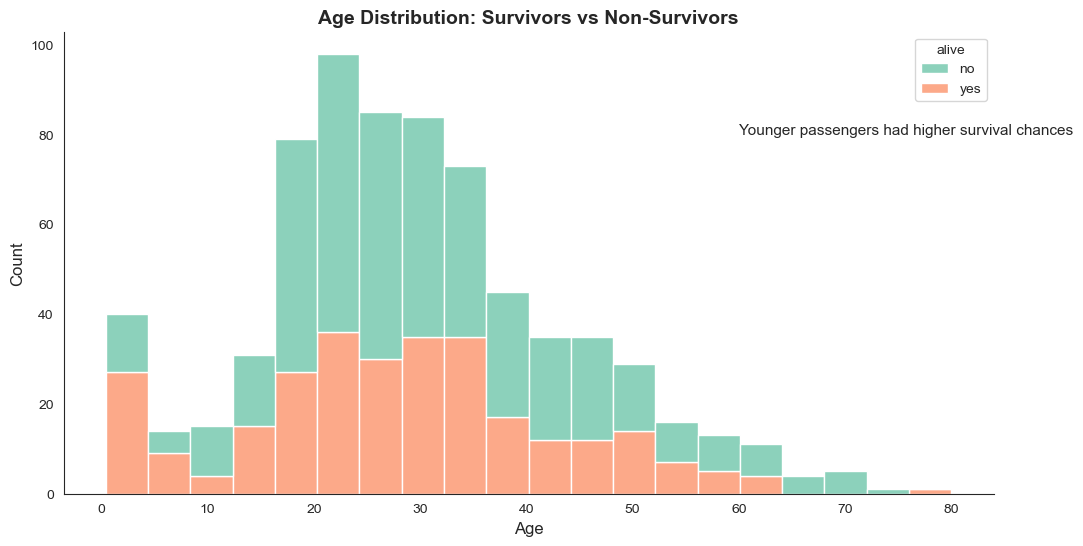

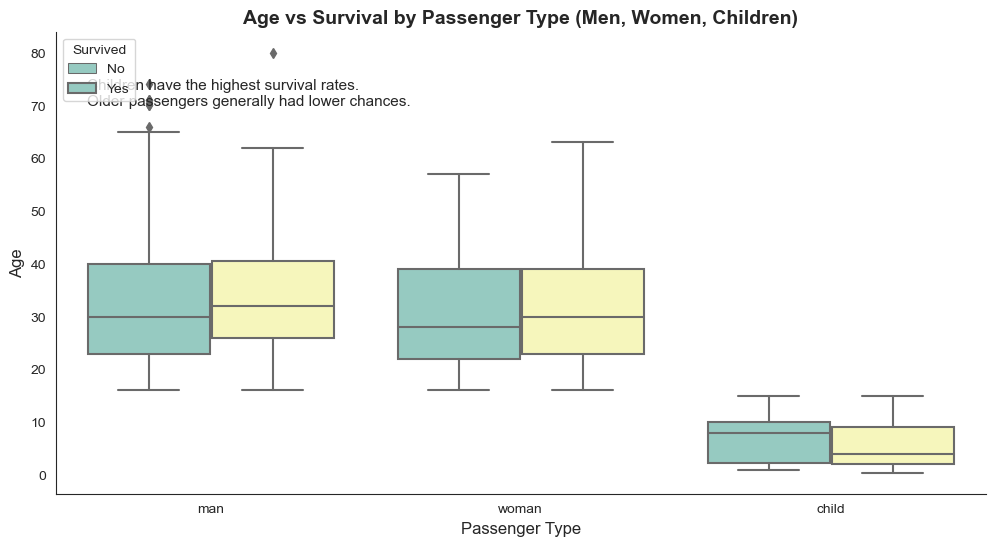

In [10]:
sns.set_style("white")  


fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=titanic, x="age", hue="alive", multiple="stack", kde=False, bins=20, palette="Set2", ax=ax)


ax.set_title("Age Distribution: Survivors vs Non-Survivors", fontsize=14, fontweight='semibold')
ax.set_xlabel("Age", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.text(x=60, y=80, s="Younger passengers had higher survival chances", fontsize=11, fontweight='normal')

sns.despine()


fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=titanic, x="who", y="age", hue="alive", palette="Set3", ax=ax)


ax.set_title("Age vs Survival by Passenger Type (Men, Women, Children)", fontsize=14, fontweight='semibold')
ax.set_xlabel("Passenger Type", fontsize=12)
ax.set_ylabel("Age", fontsize=12)
ax.legend(title="Survived", labels=["No", "Yes"], loc="upper left")
ax.text(x=-0.4, y=70, s="Children have the highest survival rates.\nOlder passengers generally had lower chances.", fontsize=11)

sns.despine()


plt.show()


**Did people on all decks have the same survival rate?**

The probabilities of survival and death can be computed as follows. We count the total number of people in each group ([`pandas.Series.value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) and divide by the total number of passengers:

In [11]:
titanic['alive'].value_counts() / len(titanic)

alive
no     0.616162
yes    0.383838
Name: count, dtype: float64

We see that the total survival rate was 38%.

To do the same for each deck, we first to handle NaN-values in the deck entries. We add a new column, that has a categorical entry "None" for all passengers with an unspecified deck entry:

In [12]:
titanic['deck_all'] = titanic['deck'].cat.add_categories("None").fillna("None")

<div class="alert alert-success">
    
Now compute the survival rates per deck and plot the resulting series using, for example, [`seaborn.barplot`](https://seaborn.pydata.org/generated/seaborn.barplot.html).

</div>

Hints:
- Pandas allows you to filter data. `titanic[ titanic['age'] > 10 ]` returns a series of all passengers that are older than 10 years. This can be used to filter only people that survived.
- You can divide a series by a series elementwise. `titanic['fare'] / titanic['age']` computes for each passanger the fraction fare divided by age (i.e. ticket price per year they lived - which is nonesense, but computable).

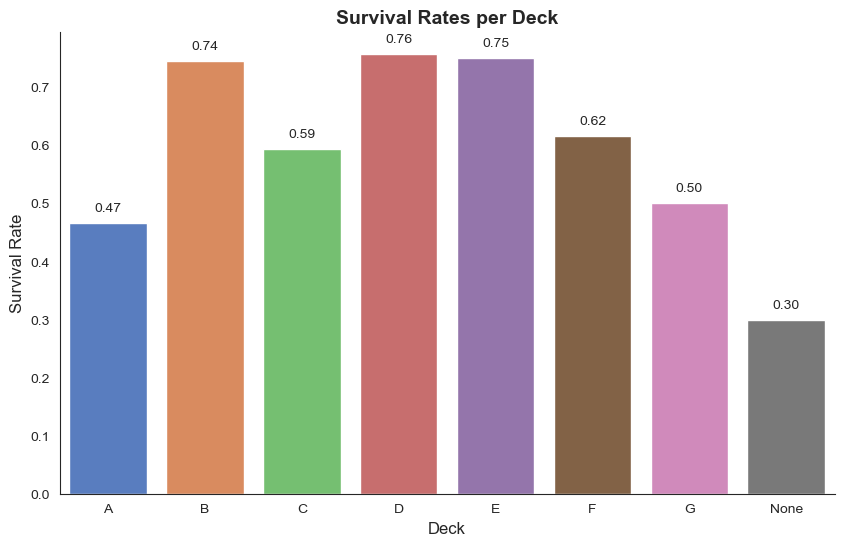

In [13]:
survival_rates_per_deck = titanic.groupby("deck_all")["survived"].mean()


fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=survival_rates_per_deck.index, y=survival_rates_per_deck.values, palette="muted", ax=ax)


ax.set_title("Survival Rates per Deck", fontsize=14, fontweight='semibold')
ax.set_xlabel("Deck", fontsize=12)
ax.set_ylabel("Survival Rate", fontsize=12)


for i, rate in enumerate(survival_rates_per_deck):
    ax.text(i, rate + 0.02, f"{rate:.2f}", ha='center', fontsize=10)


sns.despine()


plt.show()


<div class="alert alert-info">
    
## 4. Fake news?
</div>

You talk to a friend about the titanic dataset and he/she says: 
> It's so unfair. Only elderly people could afford First Class tickets and have a good trip on the Titanic.

<div class="alert alert-success">
    
Briefly discuss this statement. Write approximately 10-15 lines.
</div>

Hint:
- Explanation of **Discuss**: Essentially this is a written debate where you are using your skill at reasoning, backed up by carefully selected evidence to make a case for and against an argument, or point out the advantages and disadvantages of a given context. Remember to arrive at a conclusion. source (not necessary to read): [Essay terms explained by University of Leicester](https://www2.le.ac.uk/projects/oer/oers/ssds/oers/writing-skills/writingskillscg.pdf)


### Answer:
<div class="alert alert-warning">
  The statement <strong>"Only elderly people could afford First Class tickets and have a good trip on the Titanic"</strong> is partially true but oversimplified.

  <ol>
    <li>
      <strong>Why it seems true:</strong>
      <ul>
        <li>First-class tickets were expensive, and wealthier individuals—often older—were more likely to afford them.</li>
        <li>The data shows that the average age of first-class passengers was higher than in other classes.</li>
      </ul>
    </li>
    <li>
      <strong>Why it’s not entirely accurate:</strong>
      <ul>
        <li>Not all first-class passengers were elderly. Many younger people, including families, also traveled in first class.</li>
        <li>The age distribution in first class included a wide range of ages, from children to seniors.</li>
        <li>Having a "good trip" depended more on wealth and status than age. Age wasn’t the main factor—it was money.</li>
      </ul>
    </li>
    <li>
      <strong>The bigger picture:</strong>
      <ul>
        <li>Age wasn’t the deciding factor for being in first class. Wealth and social status played a more significant role.</li>
        <li>Passengers of all ages enjoyed first-class accommodations as long as they could afford them.</li>
      </ul>
    </li>
  </ol>
</div>



### Supporting charts:

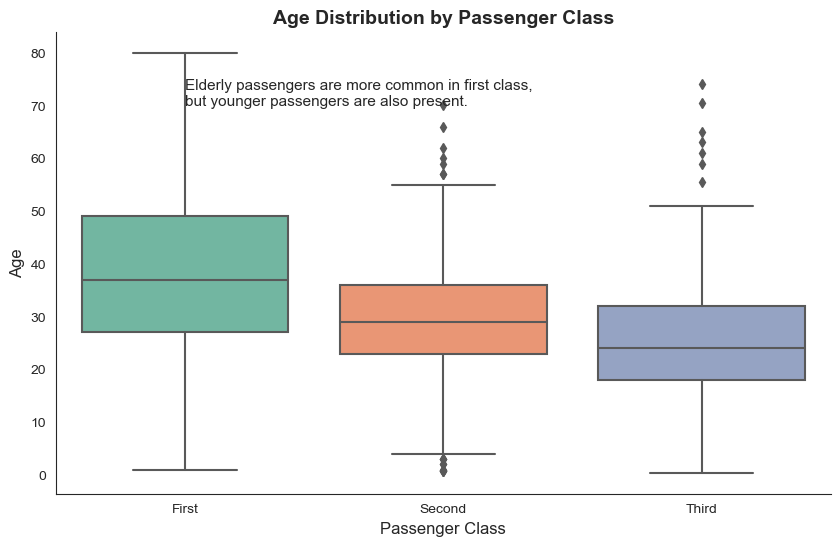

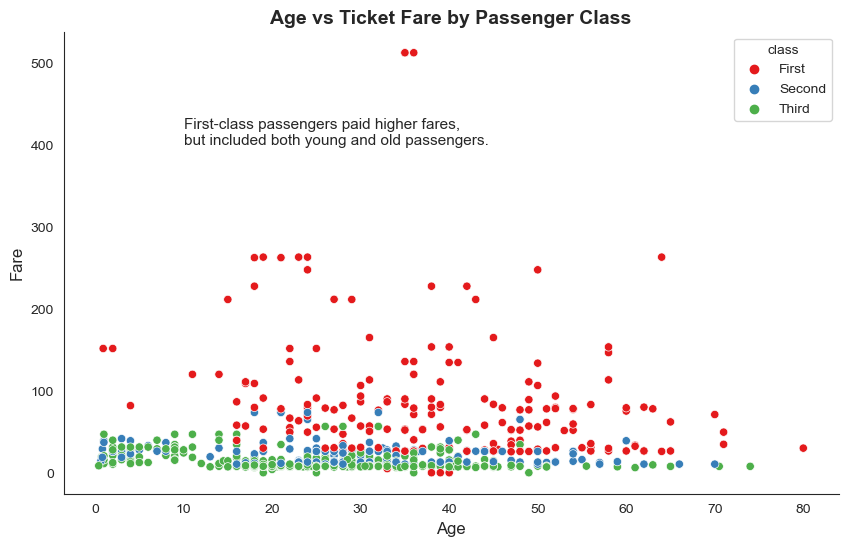

In [14]:
# suggestions: countplot, displot, histplot, scatterplot, boxplot, jointplot
sns.set_style("white")

# Age distribution by class (boxplot)
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=titanic, x="class", y="age", palette="Set2", ax=ax)
ax.set_title("Age Distribution by Passenger Class", fontsize=14, fontweight='semibold')
ax.set_xlabel("Passenger Class", fontsize=12)
ax.set_ylabel("Age", fontsize=12)
ax.text(x=0, y=70, s="Elderly passengers are more common in first class,\nbut younger passengers are also present.", fontsize=11)
sns.despine()

# Scatterplot for age vs fare by class
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=titanic, x="age", y="fare", hue="class", palette="Set1", ax=ax)
ax.set_title("Age vs Ticket Fare by Passenger Class", fontsize=14, fontweight='semibold')
ax.set_xlabel("Age", fontsize=12)
ax.set_ylabel("Fare", fontsize=12)
ax.text(x=10, y=400, s="First-class passengers paid higher fares,\nbut included both young and old passengers.", fontsize=11)
sns.despine()

plt.show()
